In [1]:
# THIS IS USED TO ANALYSE THE OUTPUT from simulation of LAMOST


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import astropy.io.fits as fits
import csv
import matplotlib.pyplot as plt
from matplotlib import cm
import math as m
import PyAstronomy as PA
import galpy.util.bovy_coords as gub

In [3]:
dpath = "/Users/htian/Documents/GitHub/simu_lamost/"
fn = "sim_area_20180923_20230923.dat"
data = pd.read_csv(dpath+fn,delim_whitespace=True)
ra = data['ra']
dec = data['dec']
obs_data = data['obs_date']
obs_time = data['obs_time']
expt = data['exposure']
freq = data['exposure_times']
print(np.max((dec)),np.min((dec)))

59.99784741 -9.994176363


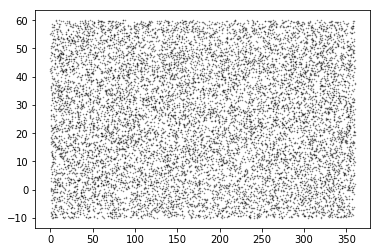

In [8]:
plt.plot(ra,dec,'ko',alpha=0.5,markersize=0.5)